# Решающие деревья

#  I. Немного решающих деревьев
##### Задача 1. Построение "среднего" алгоритма
В этом задании вам нужно построить графики, демонстрирующие, как алгоритм аппроксимирует истинную зависимость в данных и как он меняется в зависимости от гиперпараметров метода обучения.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [57]:
def f(x):
    return np.sin(x)   # истинная зависимость в данных
sample_size = 100      # длина выборки
samples_num = 20       # количество выборок
linspace = np.linspace(0, 7, 1000)  # точки для построения графиков

__1. (2 балла)__
1. Сгенерируйте выборку $x$ из одномерного экспоненциального распределения (np.random.exponential) длины sample_size.
1. Создайте вектор целевых переменных $y$ как сумму $f(x)$ и случайного шума, сгенерированного из равномерного распределения на отрезке $[-1, 1]$ (np.random.uniform).
1. Обучите DecisionTreeRegressor с параметрами по умолчанию на полученной выборке и сделайте предсказания для объектов из linspace.
1. Постройте два графика на одном рисунке: $f(x)$ и зависимость, восстановленную решающим деревом.

    Рекомендация: не забудьте, что все методы обучения в sklearn требуют на вход двумерную матрицу объекты-признаки. Сделать такую из одномерного вектора можно добавлением мнимых осей (np.newaxis).

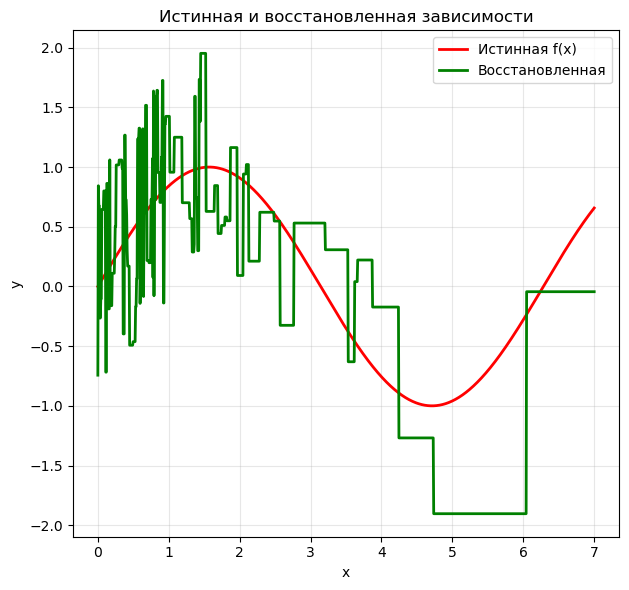

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

def f(x):
    return np.sin(x)


sample_size = 100
samples_num = 20 
linspace = np.linspace(0, 7, 1000)


plt.figure(figsize=(12, 6))


x = np.random.exponential(scale=1.0, size=sample_size)
    
    
noise = np.random.uniform(-1, 1, size=sample_size)
y = f(x) + noise

X_2d = x[:, np.newaxis]

tree = DecisionTreeRegressor()
tree.fit(X_2d, y)
linspace_2d = linspace[:, np.newaxis]
y_pred = tree.predict(linspace_2d)



plt.subplot(1, 2, 1)
plt.plot(linspace, f(linspace), 'r-', linewidth=2, label='Истинная f(x)')
plt.plot(linspace, y_pred, 'g-', linewidth=2, label='Восстановленная')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Истинная и восстановленная зависимости')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

__2. (1 балл)__

Повторите первые 3 шага, описанные выше, samples_num раз. На одном графике для каждого обученного решающего дерева визуализируйте восстановленную им зависимость (рекомендуется все такие линии рисовать полупрозрачными и серым цветом: plt.plot(...... color="gray", alpha=0.5)).  На этом же графике изобразите истинную зависимость f(x) (красным цветом: color="red") и усредненную по всем деревьям восстановленную зависимость (черным цветом: color="black").    

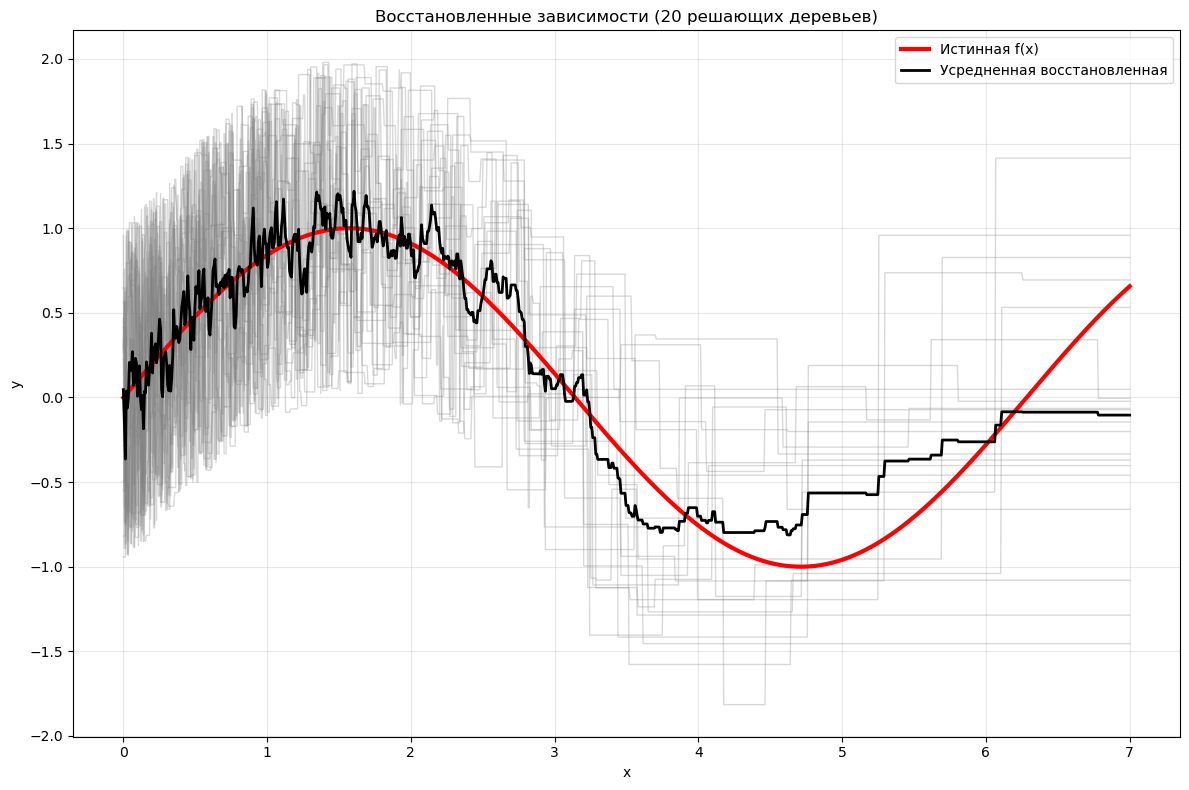

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

def f(x):
    return np.sin(x)


def depth(a):
    if a is None:
        return 0
    if hasattr(a, 'tree_'):
        return a.tree_.max_depth
    return 0


sample_size = 100   
samples_num = 20
linspace = np.linspace(0, 7, 1000)

plt.figure(figsize=(12, 8))


all_predictions = []


for i in range(samples_num):
    
    x = np.random.exponential(scale=1.0, size=sample_size)
    noise = np.random.uniform(-1, 1, size=sample_size)
    y = f(x) + noise
    
    
    X_2d = x[:, np.newaxis]
    
    
    tree = DecisionTreeRegressor()
    tree.fit(X_2d, y)
    
    
    linspace_2d = linspace[:, np.newaxis]
    y_pred = tree.predict(linspace_2d)
    all_predictions.append(y_pred)
    
    
    plt.plot(linspace, y_pred, color="gray", alpha=0.3, linewidth=1)


mean_predictions = np.mean(all_predictions, axis=0)


plt.plot(linspace, f(linspace), color="red", linewidth=3, label='Истинная f(x)')
plt.plot(linspace, mean_predictions, color="black", linewidth=2, label='Усредненная восстановленная')


plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Восстановленные зависимости ({samples_num} решающих деревьев)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

__3.(0.5 балл):__
Повторите предыдущий пункт, установив максимальную глубину решающего дерева равной 2, а затем равной 4. Таким образом, у вас получится еще два графика.

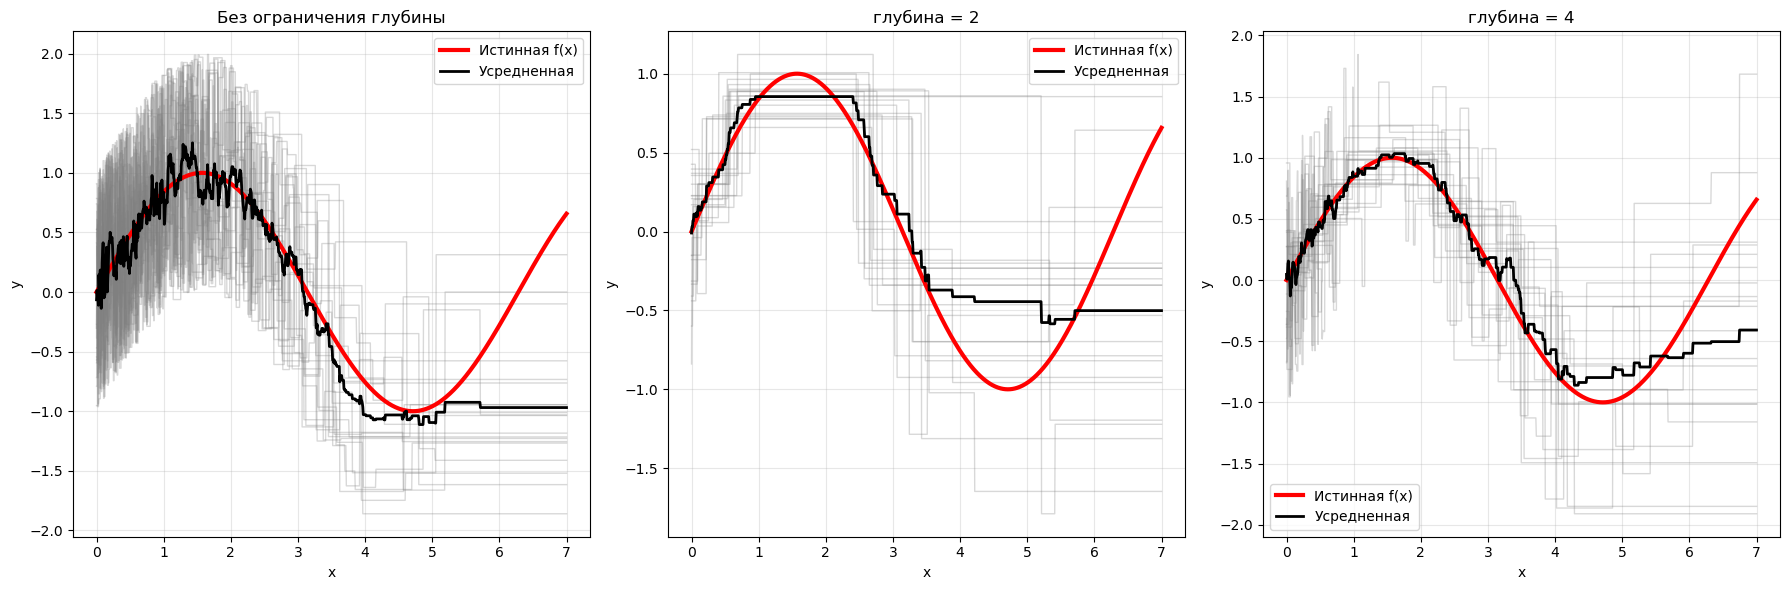

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

def f(x):
    return np.sin(x)

def depth(tree):
    if tree is None:
        return 0
    if hasattr(tree, 'tree_'):
        return tree.tree_.max_depth
    return 0


sample_size = 100 
samples_num = 20
linspace = np.linspace(0, 7, 1000)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
max_depths = [None, 2, 4]
titles = ['Без ограничения глубины', 'глубина = 2', 'глубина = 4']

for idx, max_depth in enumerate(max_depths):
    all_predictions = []
    for i in range(samples_num):
        x = np.random.exponential(scale=1.0, size=sample_size)
        noise = np.random.uniform(-1, 1, size=sample_size)
        y = f(x) + noise
        X_2d = x[:, np.newaxis]
        
        
        if max_depth is None:
            tree = DecisionTreeRegressor()
        else:
            tree = DecisionTreeRegressor(max_depth=max_depth)
        tree.fit(X_2d, y)
        linspace_2d = linspace[:, np.newaxis]
        y_pred = tree.predict(linspace_2d)
        all_predictions.append(y_pred)
        
        axes[idx].plot(linspace, y_pred, color="gray", alpha=0.3, linewidth=1)
    
    
    mean_predictions = np.mean(all_predictions, axis=0)
    
    
    axes[idx].plot(linspace, f(linspace), color="red", linewidth=3, label='Истинная f(x)')
    

    axes[idx].plot(linspace, mean_predictions, color="black", linewidth=2, label='Усредненная')
    
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('y')
    axes[idx].set_title(titles[idx])
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    



plt.tight_layout()
plt.show()

__4. (0.5 балла)__ Что можно сказать о смещении решающих деревьев, исходя из проведенного эксперимента? В каких из трех рассмотренных случаев (без ограничения на глубину дерева и с ограничением 2 и 4) можно утверждать, что смещение решающего дерева близко к нулю?

**Ответ:**

Без ограничения глубины:
- Усредненная функция близка к истинной
- можно сказать, что смещение близко к нулю
- но отдельные деревья сильно отличаются от истинной

Глубина 2:
- Усредненная функция имеет сильное отклонение
- отдельные деревья далеки от истинной функции

Глубина 4:
- Усредненная функция близка к истинной, даже ближе, чем в 1 случае
- отдельные деревья более близки к истинной функции  уже больше, чем в 1 и 2 случаях
- можно сказать, что смещение близко к нулю

### II. Решающие деревья чужими руками

#### Задача 3.
В этой части вам нужно посмотреть на класс написанный за вас для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__8. (1 балл)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [60]:
import pandas as pd
data = pd.read_csv('students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [19]:
from importlib import reload
from matplotlib import pyplot as plt
import hw3code
reload(hw3code)

<module 'hw3code' from '/Users/elizavetabachurina/hw3code.py'>

In [22]:
plt.figure()
x, y, bx, by = hw3code.find_best_split

TypeError: cannot unpack non-iterable function object

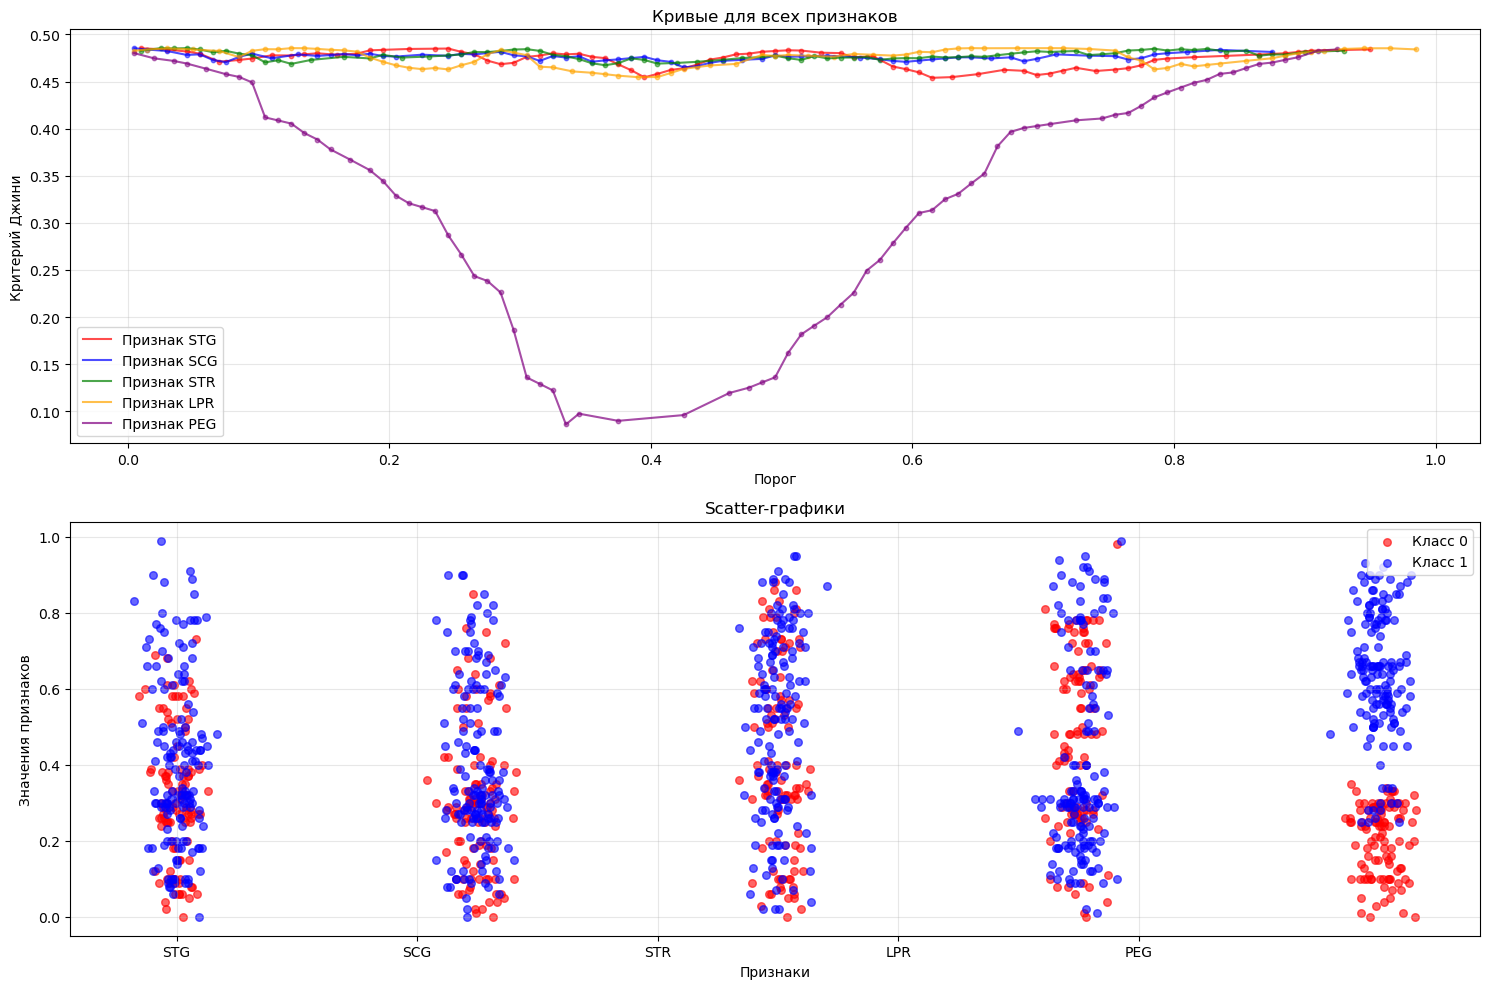

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


data = pd.read_csv('students.csv')
data.head()


X = data.iloc[:, :5]
y = data.iloc[:, 5]

def get_gini(groups, classes):
    total_size = sum(len(group) for group in groups)
    gini = 0.0
    for group in groups:
        if len(group) == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = (group == class_val).sum() / len(group)
            score += p * p
        gini += (1.0 - score) * (len(group) / total_size)
    return gini




plt.figure(figsize=(15, 10))


plt.subplot(2, 1, 1)

feature_names = X.columns
colors = ['red', 'blue', 'green', 'orange', 'purple']

for feature_idx in range(5):
    feature_values = X.iloc[:, feature_idx].values
    sorted_indices = np.argsort(feature_values)
    sorted_features = feature_values[sorted_indices]
    sorted_labels = y.iloc[sorted_indices].values
    
    thresholds = []
    gini_values = []
    
    classes = np.unique(y)
    for i in range(1, len(sorted_features)):
        if sorted_features[i] != sorted_features[i-1]:
            threshold = (sorted_features[i] + sorted_features[i-1]) / 2
            
            left_mask = feature_values <= threshold
            right_mask = feature_values > threshold
            
            left_group = y[left_mask]
            right_group = y[right_mask]
            
            current_gini = get_gini([left_group, right_group], classes)
            
            thresholds.append(threshold)
            gini_values.append(current_gini)
    
    plt.plot(thresholds, gini_values, color=colors[feature_idx], label=f'Признак {feature_names[feature_idx]}',
             alpha=0.7)
    plt.scatter(thresholds, gini_values, color=colors[feature_idx], s=10, alpha=0.5)

plt.xlabel('Порог')
plt.ylabel('Критерий Джини')
plt.title('Кривые для всех признаков')
plt.legend()
plt.grid(True, alpha=0.3)


plt.subplot(2, 1, 2)

for feature_idx in range(5):
    feature_values = X.iloc[:, feature_idx].values
    
    x_offset = feature_idx * 0.8
    

    class_0_mask = y == 0
    class_1_mask = y == 1
    
    plt.scatter(feature_idx + np.random.normal(0, 0.05, sum(class_0_mask)), feature_values[class_0_mask], 
                color='red', alpha=0.6, s=30, label='Класс 0' if feature_idx == 0 else "")
    plt.scatter(feature_idx + np.random.normal(0, 0.05, sum(class_1_mask)), feature_values[class_1_mask], 
                color='blue', alpha=0.6, s=30, label='Класс 1' if feature_idx == 0 else "")

plt.xlabel('Признаки')
plt.ylabel('Значения признаков')
plt.title('Scatter-графики')
plt.xticks([0, 0.8, 1.6, 2.4, 3.2], feature_names)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


__9. (1 балл)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

Признак PEG имеет минимальное значение порога Джинни, поэтому подойдет лучше всего именно он. 
На scatter-графике также заметно чёткое разделение только у признака PEG, поэтому результат согласуется со scatter-графиком.

Хорошие признаки:
- Кривая имеет глубокий провал
- Минимальное значение Джини близко к 0
- Широкий диапазон порогов с низкими значениями Джини
  
Плохие признаки:
- Кривая плоская или с небольшими колебаниями
- Нет выраженного минимума
- Значения Джинни постоянно высокие

__10. (1 балл)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from collections import Counter
import matplotlib.pyplot as plt


def H(div):
    z = np.count_nonzero(div)
    nz = div.shape[0] - z
    z /= div.shape[0]
    nz /= div.shape[0]
    return 1 - z**2 - nz**2

def find_best_split(feature_vector, target_vector):
    m = np.array([feature_vector, target_vector])
    m = m.T
    m = m[m[:, 0].argsort()]
    m = m.T
    sort = m
    if (sort[0][0] == sort[0][-1]):
        return None
    sort2 = np.copy(sort)
    sort3 = np.copy(sort)
    sort3 = np.delete(sort3, 0, axis=1)
    sort2 = np.delete(sort2, -1, axis=1)
    thresholds = (sort3[0] + sort2[0]) / 2
    l = len(thresholds)
    ginis = np.zeros(l)
    for i in range(0, len(thresholds)):
        fg = i + 1
        l = sort[0].shape[0]
        left = -fg / l
        right = -(l - fg) / l
        ginis[i] = left * H(sort[1][:fg]) + right * H(sort[1][fg:])
    mi = np.argmax(ginis)
    return thresholds, ginis, thresholds[mi], ginis[mi]

class DecisionTree():
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            if np.all(feature_vector[0] == feature_vector):
                continue

            best_split_found = find_best_split(feature_vector, sub_y)
            if best_split_found is None:
                continue

            _, _, threshold, gini = best_split_found
            if gini_best is None or gini > gini_best:
                a = feature_vector <= threshold
                if not ((len(sub_y[a]) == 0) or (len(sub_y[a]) == len(sub_y))):
                    feature_best = feature
                    gini_best = gini
                    split = feature_vector <= threshold
                    if feature_type == "real":
                        threshold_best = threshold
                    elif feature_type == "categorical":
                        threshold_best = list(map(lambda x: x[0],
                                                  filter(lambda x: x[1] <= threshold, categories_map.items())))
                    else:
                        raise ValueError
        if(len(sub_y[split]) == len(sub_y)):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return
        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]

        feature_split = node["feature_split"]
        if (self._feature_types[feature_split] == "real" and x[feature_split] <= node["threshold"]) or \
                (self._feature_types[feature_split] == "categorical" and x[feature_split] in node["categories_split"]):
            return self._predict_node(x, node["left_child"])
        else:
            return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        X = X.astype(np.float64)
        y = y.astype(np.float64)
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)



data = pd.read_csv('msh.csv')


y = data.iloc[:, 0]
X = data.iloc[:, 1:]


le = LabelEncoder()


y_encoded = le.fit_transform(y)


X_encoded = X.apply(le.fit_transform)


X, y = X_encoded, y_encoded


n_samples = len(X)
indices = np.random.permutation(n_samples)
n_samples = n_samples // 2

train_idx = indices[:n_samples]
test_idx = indices[n_samples:]

X_train = X.iloc[train_idx].values
y_train = y[train_idx]
X_test = X.iloc[test_idx].values
y_test = y[test_idx]


feature_types = ['categorical'] * X_train.shape[1]

tree = DecisionTree(feature_types=feature_types)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)



accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', round(accuracy, 4))

def get_tree_depth(node, current_depth=0):
        if node["type"] == "terminal":
            return current_depth
        left_depth = get_tree_depth(node["left_child"], current_depth + 1)
        right_depth = get_tree_depth(node["right_child"], current_depth + 1)
        return max(left_depth, right_depth)

tree_depth = get_tree_depth(tree._tree)
print('Глубина дерева:', tree_depth)


Accuracy: 0.9993
Глубина дерева: 7


### IIII. Композиции деревьев
#### Задача 4. Сравнение композиционных методов над решающими деревьями
__11. (1 балл)__

Загрузите датасет из соревнования [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/leaderboard). Возьмите из него первые 10к объектов, оставьте только вещественные признаки, а пропуски замените нулями. Разбейте выборку на обучение и контроль в соотношении 7:3.

1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов на обучающей выборке:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом (если это не так, то посмотрите как ведут себя алгоритмы с разными сидами в кроссвалидации и самих алгоритмах). Этот пример демонстрирует, что RandomForest — это более сложный алгоритм, чем бэггинг.

In [3]:
import pandas as pd
data = pd.read_csv('train-4.csv')

In [4]:
data

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114316,228708,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AL,NaN,NaN,NaN,0,NaN,NaN
114317,228710,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,E,NaN,NaN,NaN,1,NaN,NaN
114318,228711,1,NaN,NaN,C,NaN,10.069277,NaN,NaN,0.323324,...,NaN,NaN,0.156764,Q,NaN,NaN,2.417606,2,NaN,NaN
114319,228712,1,NaN,NaN,C,NaN,10.106144,NaN,NaN,0.309226,...,NaN,NaN,0.490658,BW,NaN,NaN,3.526650,0,NaN,NaN


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


data = pd.read_csv('train-4.csv')


data = data.head(10000)


num_cols = data.select_dtypes(include=[np.number]).columns.tolist()

target_col = data.columns[1]
id_col = data.columns[0]
num_cols = [col for col in numeric_cols if col != target_col and col != id_col]

X = data[num_cols]
y = data[target_col]


X = X.fillna(0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


dt_clf = DecisionTreeClassifier(random_state=42)
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)


clfs = {
    'DecisionTree': dt_clf,
    'Bagging': bagging_clf,
    'RandomForest': rf_clf
}

results = {}
for name, clf in clfs.items():
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
    print(str(name) + ':')
    print('Accuracy:',  scores)
    print('Mean accuracy:',  round(np.mean(scores), 4))
    print()


DecisionTree:
Accuracy: [0.65681234 0.66695242 0.65795114]
Mean accuracy: 0.6606

Bagging:
Accuracy: [0.75407027 0.75739391 0.75439348]
Mean accuracy: 0.7553

RandomForest:
Accuracy: [0.75749786 0.75567938 0.75610802]
Mean accuracy: 0.7564



#### Задача 5. Число деревьев в случайном лесе
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__12. (1 балл)__

Переберите значения от 20 до 1000-5000 деревьев с шагом 20, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $20 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?